In [2]:

!python -m pip install --upgrade pip
!pip install -U scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df=pd.read_csv(r"C:\Users\bhagy\Downloads\archive (6) (1).csv")

In [4]:
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [5]:
df.tail()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
945,946,54,female,rural,5,3,country liquor,negative,negative,NO,...,2.0,5.4,5.2,3.4,NaN,86.0,110,70,no,no
946,947,72,female,urban,4,3,branded liquor,negative,negative,NO,...,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no,no
947,948,47,male,urban,7,3,country liquor,Positive,Positive,NO,...,2.0,6.4,4.2,2.5,1.68,90.0,110,70,no,no
948,949,54,female,rural,9,3,country liquor,Positive,Positive,NO,...,2.0,5.9,4.2,2.5,1.8,110.0,110,70,no,no
949,950,52,male,rural,8,3,country liquor,Positive,Positive,NO,...,2.0,7.1,4.2,2.5,1.8,56.0,110,70,no,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

In [7]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (950, 42)


In [8]:
print(df.describe())

             S.NO         Age  Duration of alcohol consumption(years)  \
count  950.000000  950.000000                              950.000000   
mean   475.500000   50.632632                               20.606316   
std    274.385677    8.808272                                7.980664   
min      1.000000   32.000000                                4.000000   
25%    238.250000   44.000000                               15.000000   
50%    475.500000   50.000000                               20.000000   
75%    712.750000   57.000000                               26.000000   
max    950.000000   80.000000                               45.000000   

       Quantity of alcohol consumption (quarters/day)         TCH         HDL  \
count                                      950.000000  591.000000  582.000000   
mean                                         5.158947  197.544839   35.486254   
std                                         22.908785   26.694968    7.982057   
min               

In [9]:
print("7.Dataset Columns:\n",df.columns)

7.Dataset Columns:
 Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U

In [10]:

df_cleaned = df.dropna(inplace=True)
df_cleaned

In [11]:
df.isnull().sum()

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [12]:
df.isnull().count()

S.NO                                                                       14
Age                                                                        14
Gender                                                                     14
Place(location where the patient lives)                                    14
Duration of alcohol consumption(years)                                     14
Quantity of alcohol consumption (quarters/day)                             14
Type of alcohol consumed                                                   14
Hepatitis B infection                                                      14
Hepatitis C infection                                                      14
Diabetes Result                                                            14
Blood pressure (mmhg)                                                      14
Obesity                                                                    14
Family history of cirrhosis/ hereditary                         

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
numeric_df = df.select_dtypes(include=['number'])

In [67]:
categorical_features=df.select_dtypes(include=['object', 'string', 'category'])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

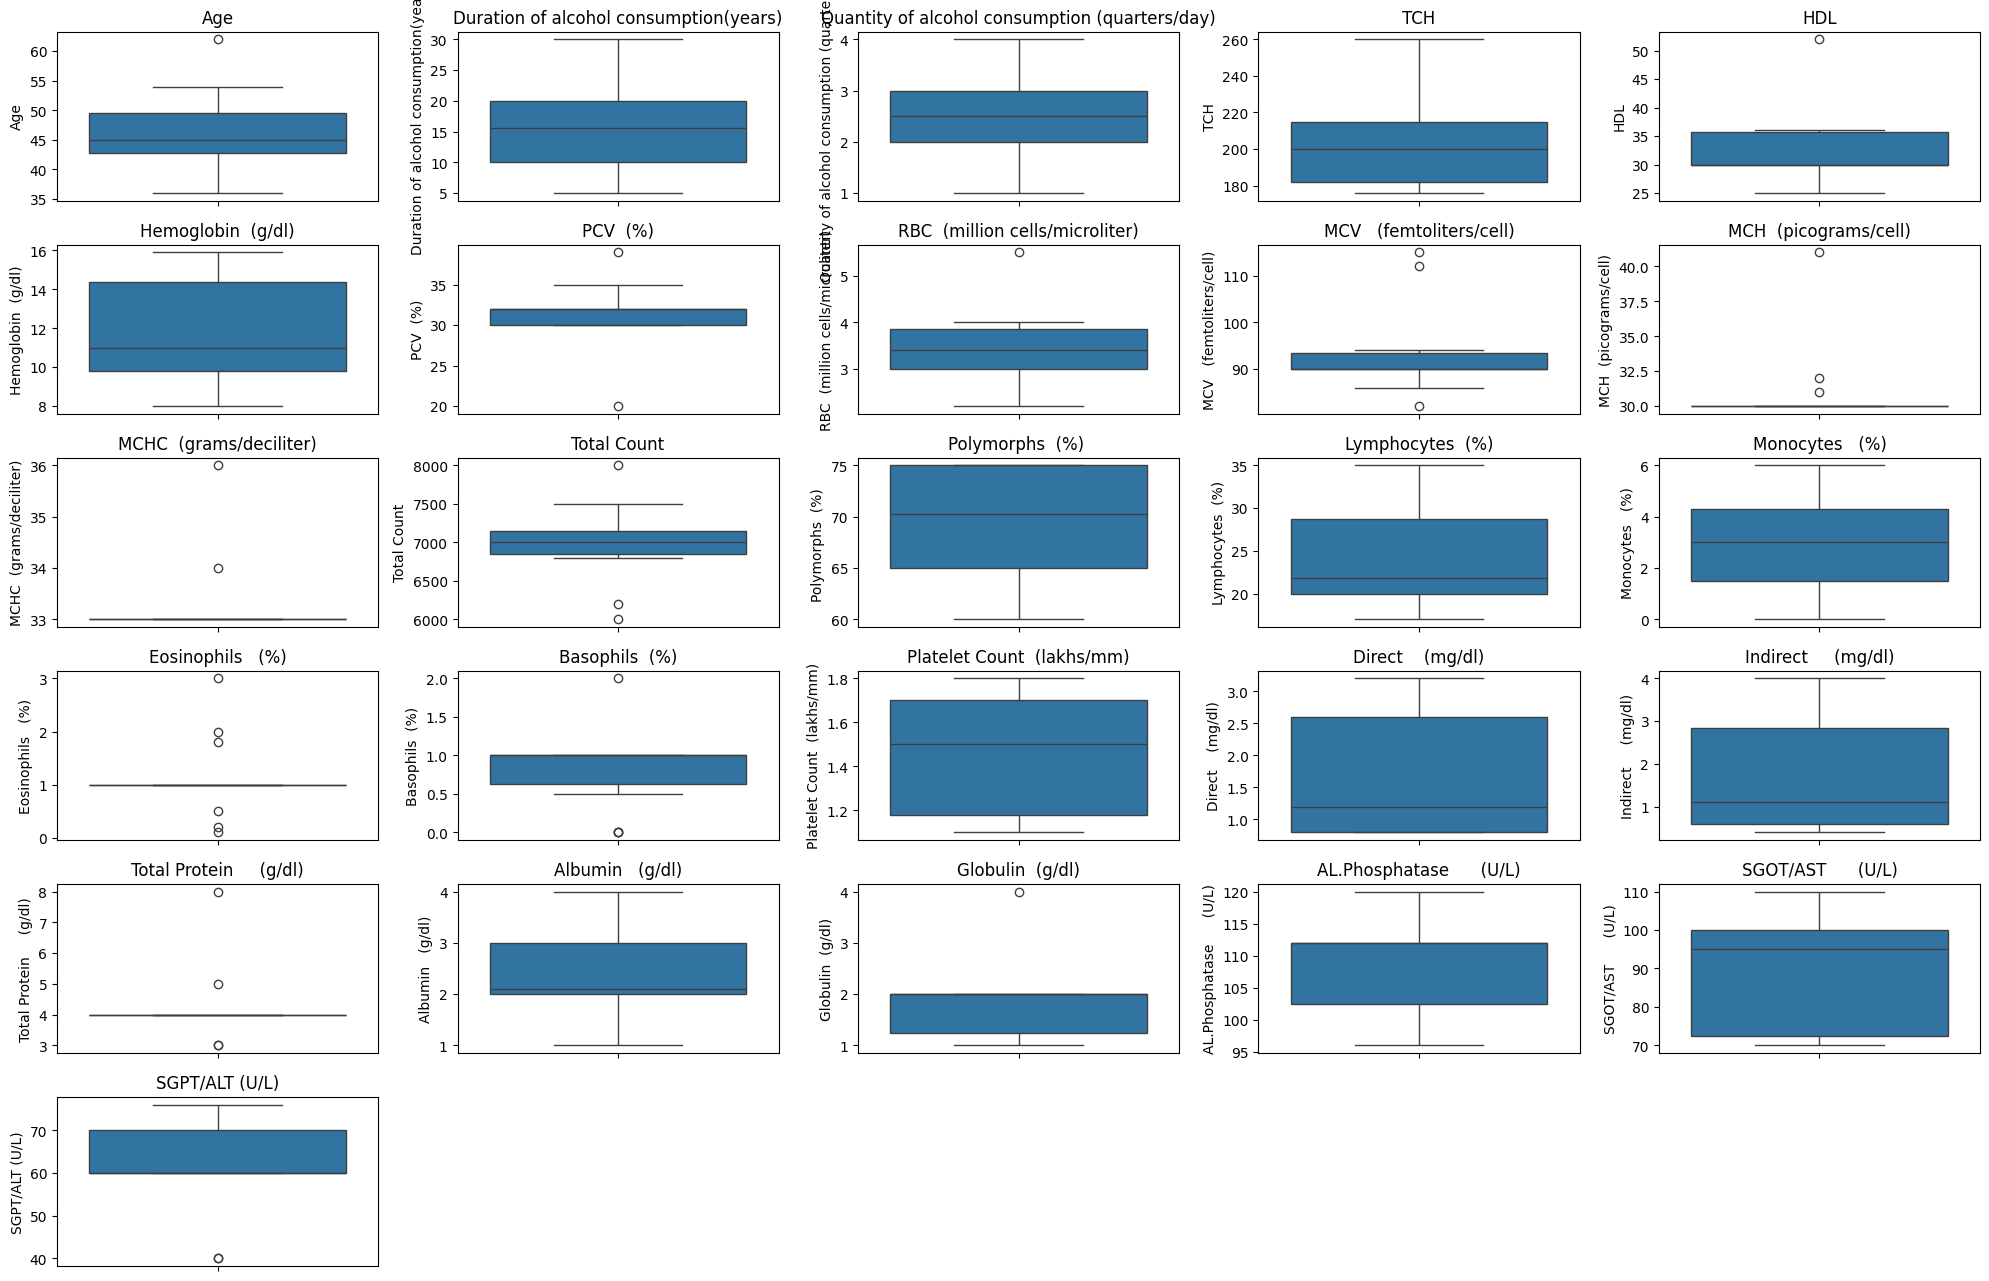

In [69]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
    if type(df[i].iloc[0])!=str:
        plt.subplot(7,5,c+1)
        sns.boxplot(y=df[i])
        plt.title(i)
        c+=1
plt.tight_layout()
plt.show()

In [70]:
for col in df.columns:
    print(f"'{col}'")

'Age'
'Gender'
'Place(location where the patient lives)'
'Duration of alcohol consumption(years)'
'Quantity of alcohol consumption (quarters/day)'
'Type of alcohol consumed'
'Hepatitis B infection'
'Hepatitis C infection'
'Diabetes Result'
'Blood pressure (mmhg)'
'Obesity'
'Family history of cirrhosis/ hereditary'
'TCH'
'TG'
'LDL'
'HDL'
'Hemoglobin  (g/dl)'
'PCV  (%)'
'RBC  (million cells/microliter)'
'MCV   (femtoliters/cell)'
'MCH  (picograms/cell)'
'MCHC  (grams/deciliter)'
'Total Count'
'Polymorphs  (%) '
'Lymphocytes  (%)'
'Monocytes   (%)'
'Eosinophils   (%)'
'Basophils  (%)'
'Platelet Count  (lakhs/mm)'
'Total Bilirubin    (mg/dl)'
'Direct    (mg/dl)'
'Indirect     (mg/dl)'
'Total Protein     (g/dl)'
'Albumin   (g/dl)'
'Globulin  (g/dl)'
'A/G Ratio'
'AL.Phosphatase      (U/L)'
'SGOT/AST      (U/L)'
'SGPT/ALT (U/L)'
'USG Abdomen (diffuse liver or  not)'
'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'


In [72]:
[e for e in df.columns if 'eosin' in e.lower()]


['Eosinophils   (%)']

In [73]:

col = ['Eosinophils   (%)']
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df[col] = np.where(
    df[col] > upper_limit, upper_limit,
    np.where(df[col] < lower_limit, lower_limit, df[col])
)

<Axes: ylabel='Eosinophils   (%)'>

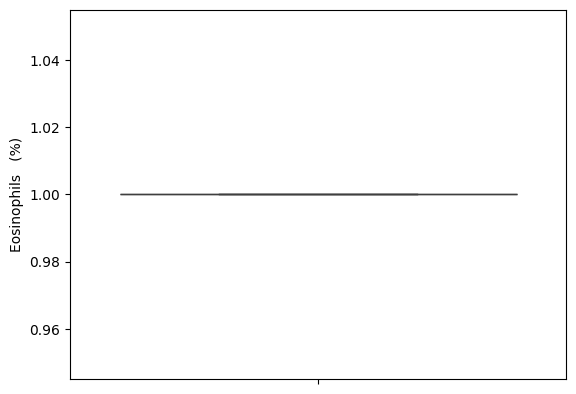

In [75]:

sns.boxplot(df['Eosinophils   (%)'])

<Axes: ylabel='Basophils  (%)'>

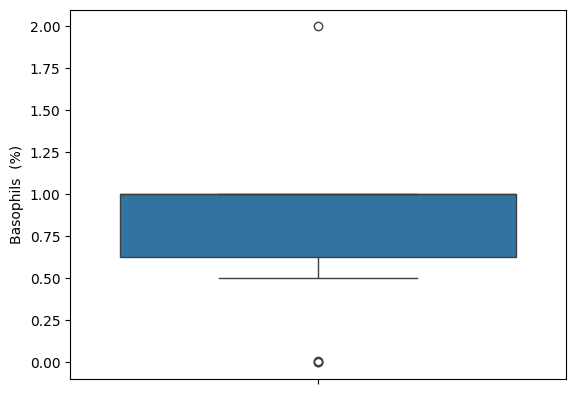

In [76]:
sns.boxplot(df['Basophils  (%)'])

In [77]:
q1= df['Basophils  (%)'].quantile(0.25)
q3= df['Basophils  (%)'].quantile(0.75)
iqr=q3-q1
upper_limit= q3 +(1.5*iqr)
lower_limit= q1 -(1.5*iqr)
df['Basophils  (%)'] = np.where(df['Basophils  (%)'] >upper_limit, upper_limit,
np.where(df['Basophils  (%)'] < lower_limit, lower_limit, df['Basophils  (%)']))

<Axes: ylabel='Basophils  (%)'>

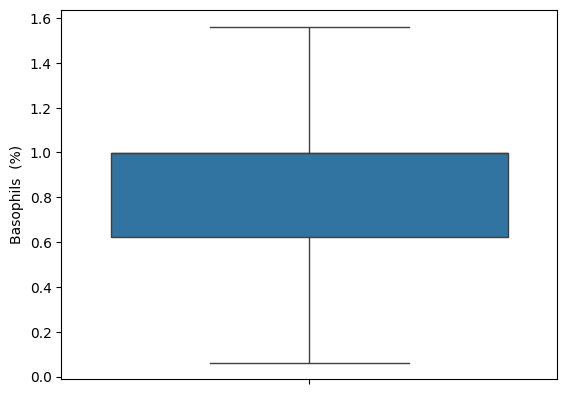

In [79]:

sns.boxplot(df['Basophils  (%)'])

In [81]:
x = df.drop('Eosinophils   (%)', axis=1)  
y = df['Eosinophils   (%)']       

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
x_train

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
913,52,male,rural,20,3,both,negative,negative,NO,110/70,...,3.0,4.0,3.0,1.0,03:01,120.0,110,70,no,YES
631,45,male,rural,10,2,branded liquor,negative,negative,NO,108/72,...,0.6,4.0,2.0,2.0,00:00,112.0,100,60,YES,YES
639,45,male,urban,10,2,branded liquor,negative,negative,NO,108/72,...,0.6,4.0,2.0,2.0,00:00,112.0,100,60,YES,YES
449,48,male,rural,28,2,both,negative,negative,NO,112/70,...,1.2,8.0,4.0,4.0,00:00,100.0,80,72,YES,YES
446,48,male,urban,25,3,branded liquor,negative,negative,NO,110/70,...,2.4,4.0,2.0,2.0,00:00,111.0,104,76,YES,YES
919,50,male,ocun,20,3,both,negative,negative,NO,110/70,...,3.0,4.0,3.0,1.0,03:01,120.0,110,70,no,YES
624,45,male,rural,20,4,branded liquor,negative,negative,NO,110/70,...,4.0,3.0,1.0,2.0,12:00,112.0,74,40,YES,YES
638,62,male,urban,30,3,branded liquor,negative,negative,YES,98/72,...,3.6,3.0,2.0,1.0,00:00,114.0,70,72,YES,YES
834,36,male,rural,5,3,country liquor,negative,negative,NO,120/70,...,0.4,4.0,2.2,2.0,00:00,100.0,72,60,YES,YES
623,54,female,urban,10,2,branded liquor,negative,negative,NO,108/75,...,0.6,4.0,2.0,2.0,00:00,112.0,100,60,YES,YES


In [84]:
x_test

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
647,45,male,rural,10,2,branded liquor,negative,negative,NO,108/72,...,0.6,4.0,2.0,2.0,00:00,112.0,100,60,YES,YES
837,42,male,rural,10,3,branded liquor,negative,negative,NO,120/70,...,0.4,4.0,2.2,2.0,06:24,100.0,72,60,YES,YES
442,38,female,rural,16,1,country liquor,negative,negative,NO,116/70,...,1.0,5.0,3.0,2.0,1.5:1,96.0,90,60,YES,YES


In [85]:
y_train

913    1.0
631    1.0
639    1.0
449    1.0
446    1.0
919    1.0
624    1.0
638    1.0
834    1.0
623    1.0
633    1.0
Name: Eosinophils   (%), dtype: float64

In [86]:
y_test

647    1.0
837    1.0
442    1.0
Name: Eosinophils   (%), dtype: float64

In [87]:
dataset_encoded = pd.get_dummies(df, drop_first=True)
x = dataset_encoded.drop('Eosinophils   (%)', axis=1) 
y = dataset_encoded['Eosinophils   (%)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

normalizer = Normalizer(norm='l1')
x_train_normalized = normalizer.fit_transform(x_train)
x_test_normalized = normalizer.transform(x_test)

In [88]:
x_train_normalized

array([[6.12579076e-03, 2.35607337e-03, 3.53411005e-04, 3.06289538e-02,
        3.06289538e-03, 9.42429347e-04, 3.76971739e-03, 4.71214674e-04,
        1.10735448e-02, 3.53411005e-03, 3.88752106e-03, 8.83527513e-01,
        7.65723845e-03, 4.12312839e-03, 1.17803668e-04, 1.17803668e-04,
        1.76705503e-04, 1.41364402e-04, 3.53411005e-04, 4.71214674e-04,
        3.53411005e-04, 1.17803668e-04, 1.41364402e-02, 1.29584035e-02,
        8.24625679e-03, 1.17803668e-04, 1.17803668e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17803668e-04, 1.17803668e-04,
        0.00000000e+00, 0.00000000e+00, 1.17803668e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.17803668e-04, 1.17803668e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.17803668e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.178036

In [89]:
df.describe()

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,46.571429,16.357143,2.500000,206.285714,32.500000,11.622857,31.285714,3.385714,93.214286,31.000000,...,0.803571,1.458571,1.614286,1.614286,4.214286,2.385714,1.857143,109.357143,89.428571,61.428571
std,6.653100,7.692225,0.759555,30.370605,6.858459,2.709287,4.027379,0.838366,9.149851,2.935198,...,0.452595,0.257230,0.999890,1.297250,1.188313,0.733650,0.770329,7.479275,15.678080,10.796825
min,36.000000,5.000000,1.000000,176.000000,25.000000,8.000000,20.000000,2.200000,82.000000,30.000000,...,0.062500,1.100000,0.800000,0.400000,3.000000,1.000000,1.000000,96.000000,70.000000,40.000000
25%,42.750000,10.000000,2.000000,182.000000,30.000000,9.800000,30.000000,3.000000,90.000000,30.000000,...,0.625000,1.177500,0.800000,0.600000,4.000000,2.000000,1.250000,102.500000,72.500000,60.000000
50%,45.000000,15.500000,2.500000,200.000000,30.000000,11.000000,32.000000,3.400000,90.000000,30.000000,...,1.000000,1.500000,1.200000,1.100000,4.000000,2.100000,2.000000,112.000000,95.000000,60.000000
75%,49.500000,20.000000,3.000000,215.000000,35.750000,14.400000,32.000000,3.850000,93.500000,30.000000,...,1.000000,1.700000,2.600000,2.850000,4.000000,3.000000,2.000000,112.000000,100.000000,70.000000
max,62.000000,30.000000,4.000000,260.000000,52.000000,15.900000,39.000000,5.500000,115.000000,41.000000,...,1.562500,1.800000,3.200000,4.000000,8.000000,4.000000,4.000000,120.000000,110.000000,76.000000


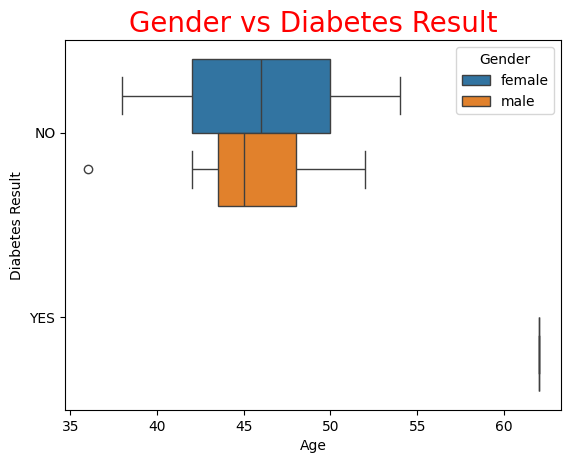

In [90]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result',color='red',size=20)
plt.show()

<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

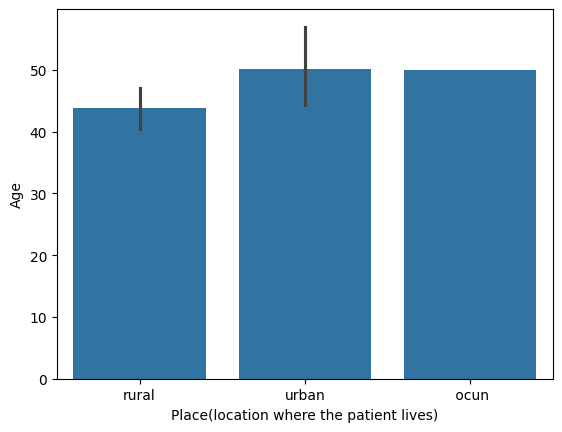

In [91]:
sns.barplot(x=df['Place(location where the patient lives)'],y=df['Age'])


Text(0.5, 1.0, 'Place vs Age')

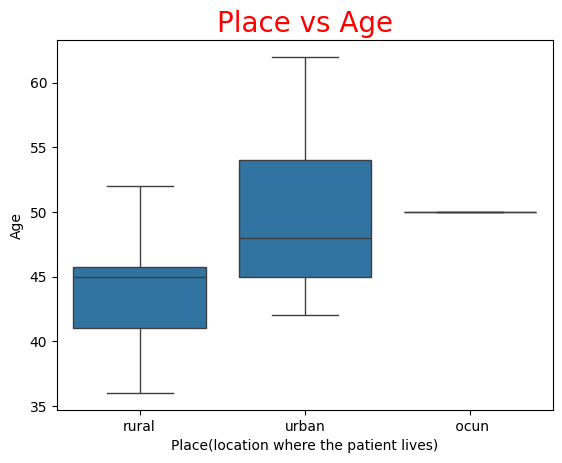

In [92]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=df)
plt.title('Place vs Age' ,color='red',size=20)

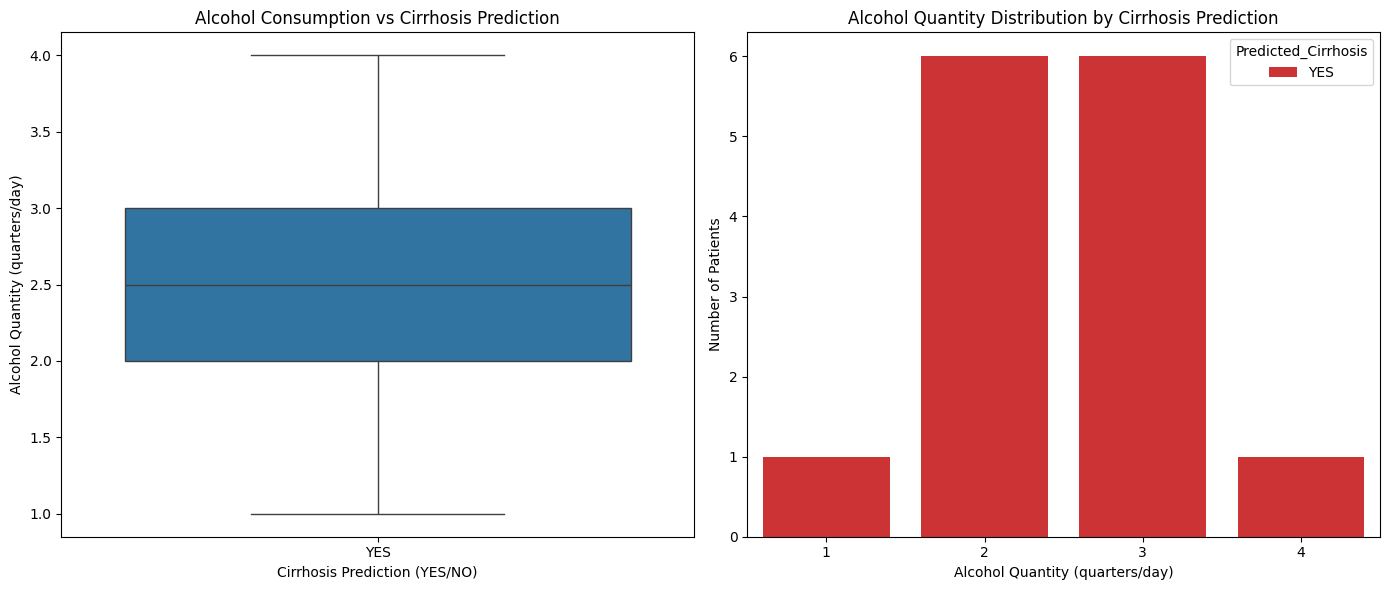

In [93]:
df.rename(columns={
    'Quantity of alcohol consumption (quarters/day)': 'Alcohol_Quantity',
    'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)': 'Predicted_Cirrhosis'
}, inplace=True)

df['Alcohol_Quantity'] = pd.to_numeric(df['Alcohol_Quantity'], errors='coerce')
df['Predicted_Cirrhosis'] = df['Predicted_Cirrhosis'].astype(str).str.strip().str.upper()

plot_df = df[['Alcohol_Quantity', 'Predicted_Cirrhosis']].dropna()

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='Predicted_Cirrhosis', y='Alcohol_Quantity', data=plot_df)
plt.title('Alcohol Consumption vs Cirrhosis Prediction')
plt.xlabel('Cirrhosis Prediction (YES/NO)')
plt.ylabel('Alcohol Quantity (quarters/day)')

plt.subplot(1, 2, 2)
sns.countplot(data=plot_df, x='Alcohol_Quantity', hue='Predicted_Cirrhosis', palette='Set1')
plt.title('Alcohol Quantity Distribution by Cirrhosis Prediction')
plt.xlabel('Alcohol Quantity (quarters/day)')
plt.ylabel('Number of Patients')

plt.tight_layout()
plt.show()

In [94]:
df['Predicted_Cirrhosis'] = df['Predicted_Cirrhosis'].astype(str).str.strip().str.upper()
print("Unique values:", df['Predicted_Cirrhosis'].unique())
print("Value counts:\n", df['Predicted_Cirrhosis'].value_counts())

Unique values: ['YES']
Value counts:
 Predicted_Cirrhosis
YES    14
Name: count, dtype: int64


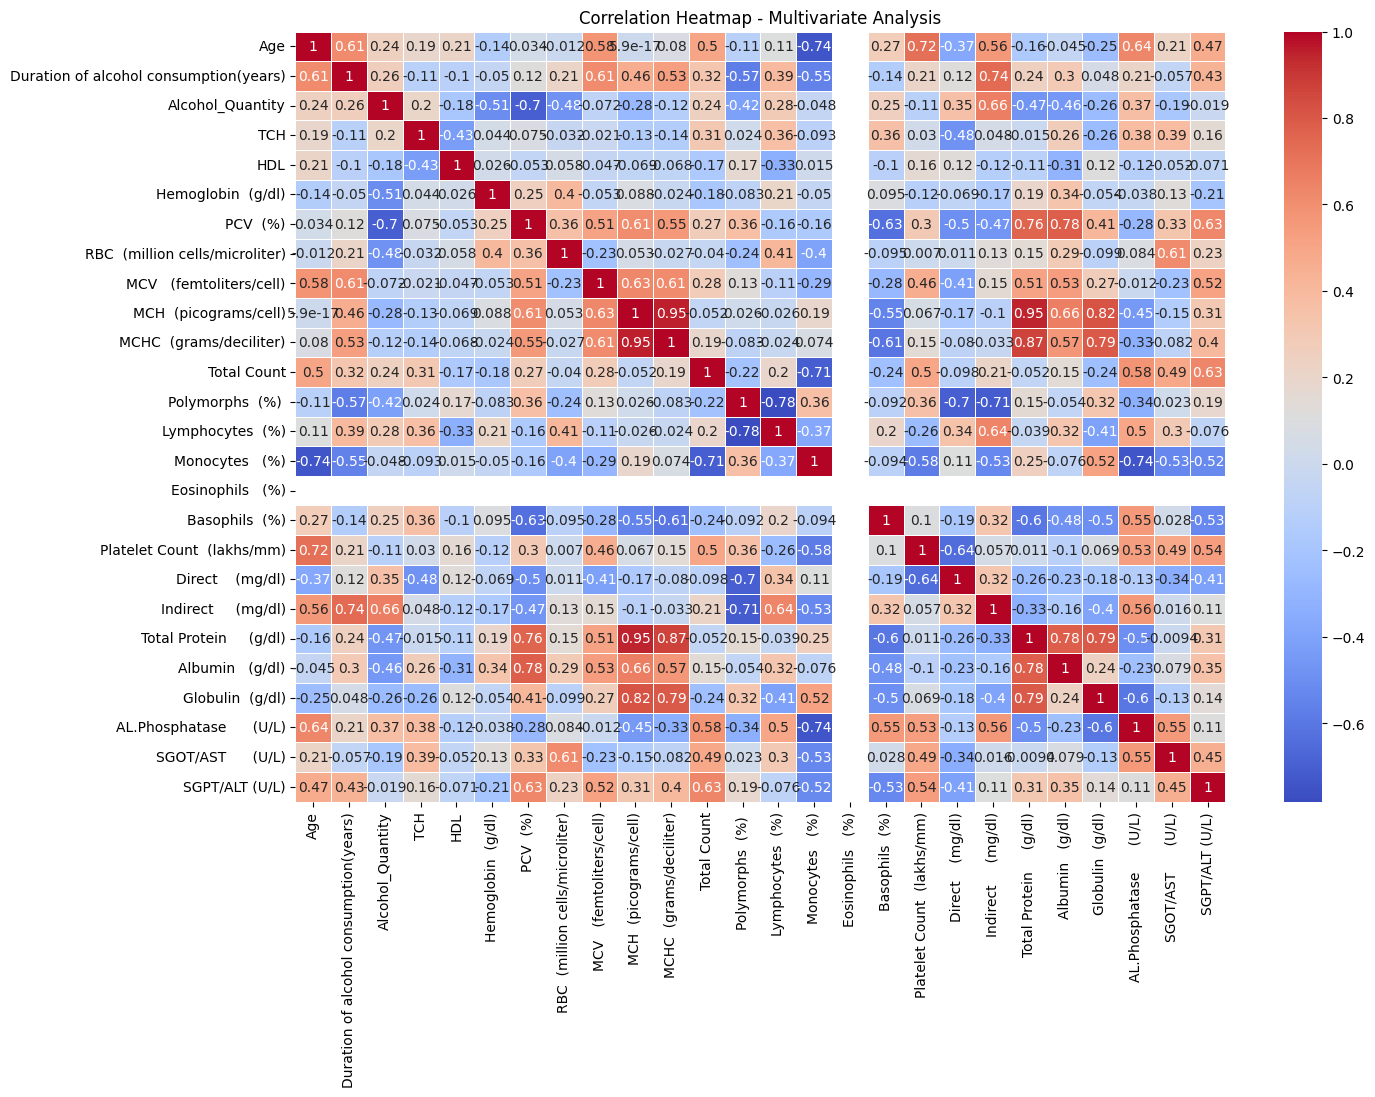

In [95]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Multivariate Analysis")
plt.show()

In [96]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [97]:
x_train

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),...,Total Bilirubin (mg/dl)_3,Total Bilirubin (mg/dl)_4.2,Total Bilirubin (mg/dl)_4.8,Total Bilirubin (mg/dl)_5,Total Bilirubin (mg/dl)_6.8,A/G Ratio_03:01,A/G Ratio_06:24,A/G Ratio_1.5:1,A/G Ratio_12:00,USG Abdomen (diffuse liver or not)_no
913,52,20,3,260.0,26.0,8.0,32.0,4.0,94.0,30.0,...,False,True,False,False,False,True,False,False,False,True
631,45,10,2,200.0,30.0,14.9,32.0,3.4,90.0,30.0,...,False,False,False,False,False,False,False,False,False,False
639,45,10,2,200.0,30.0,11.8,32.0,3.4,90.0,30.0,...,False,False,False,False,False,False,False,False,False,False
449,48,28,2,200.0,30.0,12.0,39.0,3.1,115.0,41.0,...,False,False,False,False,False,False,False,False,False,False
446,48,25,3,180.0,35.0,9.8,32.0,4.0,88.0,31.0,...,False,False,False,True,False,False,False,False,False,False
919,50,20,3,256.0,25.0,15.9,32.0,4.0,94.0,30.0,...,False,True,False,False,False,True,False,False,False,True
624,45,20,4,188.0,34.0,10.2,20.0,3.0,82.0,30.0,...,False,True,False,False,False,False,False,False,True,False
638,62,30,3,176.0,36.0,9.8,30.0,2.8,112.0,30.0,...,False,False,True,False,False,False,False,False,False,False
834,36,5,3,176.0,36.0,8.8,30.0,2.2,90.0,30.0,...,False,False,False,False,True,False,False,False,False,False
623,54,10,2,220.0,52.0,12.9,32.0,3.4,92.0,30.0,...,False,False,False,False,False,False,False,False,False,False


In [98]:
y_train

913    1.0
631    1.0
639    1.0
449    1.0
446    1.0
919    1.0
624    1.0
638    1.0
834    1.0
623    1.0
633    1.0
Name: Eosinophils   (%), dtype: float64

In [100]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [101]:
print("x_train",x_train)
print("y_train",y_train)

x_train      Age  Duration of alcohol consumption(years)  \
913   52                                      20   
631   45                                      10   
639   45                                      10   
449   48                                      28   
446   48                                      25   
919   50                                      20   
624   45                                      20   
638   62                                      30   
834   36                                       5   
623   54                                      10   
633   42                                      15   

     Quantity of alcohol consumption (quarters/day)    TCH   HDL  \
913                                               3  260.0  26.0   
631                                               2  200.0  30.0   
639                                               2  200.0  30.0   
449                                               2  200.0  30.0   
446                        

In [102]:
k=np.random.randint(1,50,60)

In [103]:
params={'n_neighbors' : k}

In [108]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(knn, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(x_train, y_train)

c:\Users\bhagy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan  1. nan nan  1.]
  warnings.warn(


,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': array([23, 4..., dtype=int32)}"
,n_iter,5
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [109]:

print('train_score - ' + str(random_search.score(x_train,y_train)))
print('test_score - ' + str(random_search.score(x_test,y_test)))

train_score - 1.0
test_score - 1.0


Best Parameters: {'n_neighbors': np.int32(7)}
Accuracy: 1.0


c:\Users\bhagy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


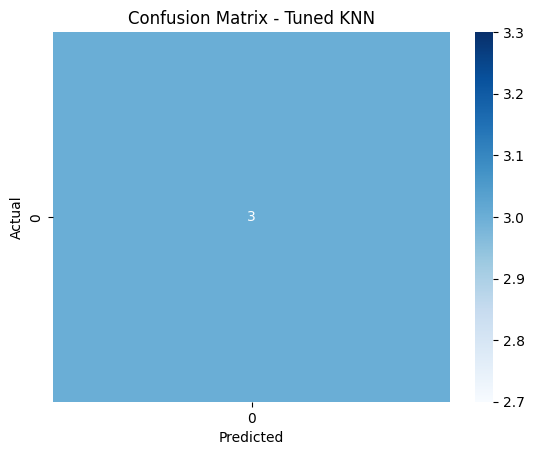

In [110]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(x_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned KNN")
plt.show()

In [111]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
